In [23]:
import numpy as np
from matplotlib import pyplot as plt
import csv

In [24]:
# Data loading function
def load_fft(fname):
    with open(fname, newline='', encoding='unicode_escape') as f:
        reader = csv.reader(f, delimiter='\t')
        freq, amp = [], []
        for rowi, row in enumerate(reader):
            if rowi not in range(5): # skip header
                freq.append(float(row[0]))
                amp.append(float(row[1]))
    return np.array(freq), np.array(amp)

In [25]:
# Load the data
fname_acc = "../data/AcceFFT.txt"
fname_ref = "../data/SigFFT.txt"
freq, acc = load_fft(fname_acc)
freq, ref = load_fft(fname_ref)
ref *= 316.23
corrected = acc / ref

In [26]:
# Zoom in on peak
width = 100e3
max_index = np.argmax(corrected)
mask = np.logical_and(freq > freq[max_index] - width/2, 
                      freq < freq[max_index] + width/2)
zoom_freq = freq[mask]
zoom_acc = acc[mask]
zoom_ref = ref[mask]
zoom_corrected = corrected[mask]

Text(0.5, 0, 'Frequency (kHz)')

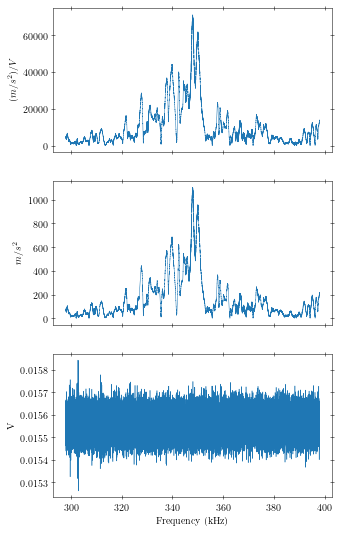

In [27]:
# Plot result and raw data
fig, axs = plt.subplots(3, 1, figsize=(5, 9), sharex=True)
ydata = [zoom_corrected, zoom_acc, zoom_ref]
ylabels = ["$(m/s^2)/V$", "$m/s^2$", "V"]
for ax, y, ylabel in zip(axs, ydata, ylabels):
    ax.plot(zoom_freq/1e3, y, lw=0.5)
    ax.set_ylabel(ylabel)
axs[2].set_xlabel("Frequency (kHz)")

In [42]:
1 / (freq[1] - freq[0]) / len(freq)

8.000000000262145e-07

In [28]:
# Some numbers
print('Peak frequency:                   {:01.1f} kHz'.format(freq[max_index] / 1e3))
print('Peak amplitude per drive voltage: {:01.2e} m/s^2 / V'.format(corrected[max_index]))
print('Peak amplitude for 20 V drive:    {:01.2e} m/s^2'.format(20*corrected[max_index]))

Peak frequency:                   348.0 kHz
Peak amplitude per drive voltage: 7.11e+04 m/s^2 / V
Peak amplitude for 20 V drive:    1.42e+06 m/s^2


In [29]:
import sys
sys.path.append("../src")
from time_series import Collection, find_ders, find_files
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
fontsize = 10
fontstyle = {
    "pdf.fonttype": 42, # type 3 pdf fonts
    "mathtext.default": 'regular', # italic math
    'mathtext.fontset': 'cm',
    'font.family' : 'STIXGeneral',
    "text.usetex": True, # latex-based math
    # sans-serif Helvetica font
    #"text.latex.preamble":
    #    r'\usepackage{helvet} \usepackage{sansmath} \sansmath',
    #"font.family": "sans-serif",
    # font sizes
    "axes.labelsize": fontsize,
    'axes.titlesize': fontsize,
    "font.size": fontsize,
    "legend.fontsize": fontsize,
    "xtick.labelsize": fontsize,
    'xtick.direction': "inout",
    'xtick.top': True,
    'xtick.major.size': 4,
    'xtick.major.width': 0.5,
    'xtick.minor.width': 0.5,
    "ytick.labelsize": fontsize,
    'ytick.direction': "inout",
    'ytick.right': True,
    'ytick.major.size': 4,
    'ytick.major.width': 0.5,
    'ytick.minor.width': 0.5,
    "axes.linewidth": 0.5,
}

plt.rcParams.update(fontstyle)
letters_lower = [r"$\mathrm{\bf{%s}}$" % lett for lett in "abcdefghijklmnopqrstuvwxyz"]
letters_round = [r"$\mathrm{\bf{(%s)}}$" % lett for lett in "abcdefghijklmnopqrstuvwxyz"] 
letters_upper = [r"$\bf{%s}$" % lett for lett in "abcdefghijklmnopqrstuvwxyz".upper()] 
letters_map = {"round": letters_round, "upper": letters_upper, "lower":letters_lower}  
def lettering(ax, x, y, num, color="k", mode="round", **kwargs):     
    letters = letters_map[mode]     
    ax.text(x, y, letters[num], weight="bold", transform=ax.transAxes,             
            horizontalalignment="center", verticalalignment="center", color=color, **kwargs)

In [30]:
# Zoom in on peak
width = 70e3
max_index = np.argmax(corrected)
mask = np.logical_and(freq > freq[max_index] - width/2, 
                      freq < freq[max_index] + width/2)
zoom_freq = freq[mask]
zoom_acc = acc[mask]
zoom_ref = ref[mask]
zoom_corrected = corrected[mask]
df = freq[0]

348.00338750000003 69133.13378553902


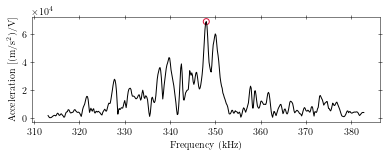

In [44]:
from brownian import bin_func
fig, ax = plt.subplots(1,1, figsize=(5.5, 2.3))
N = 100
y = bin_func(zoom_corrected, df, N*df)
x = bin_func(zoom_freq, df, N*df)/1e3
idx = np.argmax(y)
ax.plot(x, y, c="k", lw=1)
ax.ticklabel_format(style="sci", axis="y", scilimits=(0,0), useOffset=False)
ax.set_ylabel(r"Acceleration ${\rm [(m/s^2)/V]}$")
ax.set_xlabel("Frequency (kHz)")
ax.scatter(x[idx], y[idx], ec="crimson", fc="none")
print(x[idx], y[idx])
plt.tight_layout()
plt.savefig("figures/dissertation/piezo_acceleration.pdf", dpi=600)